In [1]:
import pandas as pd
import seaborn as sns

In [44]:
chen: pd.DataFrame = pd.read_csv('../data/raw/external/CHIME_FRB_ML_classification.csv')
chen_rptrs: pd.DataFrame = chen[chen['group'].str.contains('repeater')]

In [45]:
hashimoto: pd.DataFrame = pd.read_csv('../data/raw/external/chimefrbcat1_Hashimoto_2022.csv')
hashimoto

,tns_name,previous_name,repeater_name,ra,ra_err,ra_notes,dec,dec_err,dec_notes,gl,...,weight_fluence_error_m,weight,weight_error_p,weight_error_m,weighted_logrhoA,weighted_logrhoA_error_p,weighted_logrhoA_error_m,weighted_logrhoB,weighted_logrhoB_error_p,weighted_logrhoB_error_m
0,FRB20180725A,180725.J0613+67,-9999,93.42,0.04,-9999,67.10,0.20,-9999,147.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FRB20180727A,180727.J1311+26,-9999,197.70,0.10,-9999,26.40,0.30,-9999,24.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FRB20180729A,180729.J1316+55,-9999,199.40,0.10,-9999,55.58,0.08,-9999,115.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FRB20180729B,180729.J0558+56,-9999,89.90,0.30,-9999,56.50,0.20,-9999,156.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FRB20180730A,180730.J0353+87,-9999,57.39,0.03,-9999,87.20,0.20,-9999,125.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,FRB20190701A,-9999,-9999,277.50,0.20,-9999,59.00,0.20,-9999,88.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
595,FRB20190701B,-9999,-9999,302.90,0.20,-9999,80.20,0.20,-9999,112.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596,FRB20190701C,-9999,-9999,96.40,0.20,-9999,81.60,0.30,-9999,132.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,FRB20190701D,-9999,-9999,112.10,0.20,-9999,66.70,0.20,-9999,149.28,...,0.000649,1.361506,0.574701,0.206776,0.813142,0.485293,0.109293,0.894742,0.25519,0.19035


In [53]:
chen_: pd.DataFrame = chen_rptrs.merge(hashimoto, on='tns_name')
chen_ = chen_.drop(columns=['classification', 'embedding_x', 'embedding_y', 'previous_name'])
chen_ = chen_[(chen_['low_freq'] > chen_['low_freq'].min()) & (chen_['high_freq'] < chen_['high_freq'].max())]
chen_['freq_ratio'] = chen_['high_freq'] / chen_['peak_freq']
chen_['freq_range'] = chen_['high_freq'] - chen_['low_freq']
chen_

,tns_name,group,repeater_name,ra,ra_err,ra_notes,dec,dec_err,dec_notes,gl,...,weight_error_p,weight_error_m,weighted_logrhoA,weighted_logrhoA_error_p,weighted_logrhoA_error_m,weighted_logrhoB,weighted_logrhoB_error_p,weighted_logrhoB_error_m,freq_ratio,freq_range
0,FRB20180725A,repeater_cluster_1,-9999,93.42,0.04,-9999,67.1,0.2,-9999,147.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.251399,274.8
2,FRB20180801A,repeater_cluster_1,-9999,322.53,0.06,-9999,72.7,0.2,-9999,109.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.190900,209.1
4,FRB20180814A,repeater_cluster_3,FRB20180814A,65.50,0.20,-9999,73.6,0.3,-9999,136.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.135287,118.1
7,FRB20180908B,repeater_cluster_1,FRB20180908B,188.20,0.30,-9999,74.2,0.3,-9999,124.66,...,1.940884,0.588601,3.214448,0.801805,0.512453,3.193233,0.805433,0.514614,1.195857,210.2
8,FRB20180911C,repeater_cluster_1,FRB20180814A,65.50,0.20,-9999,73.6,0.3,-9999,136.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.170785,189.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,FRB20190623B,repeater_cluster_1,-9999,335.20,0.20,-9999,46.1,0.2,-9999,97.54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.222447,260.2
406,FRB20190624B,repeater_cluster_1,-9999,304.65,0.07,-9999,73.6,0.2,-9999,106.73,...,0.055905,0.032893,1.974481,0.776706,0.225966,1.978400,0.818278,0.471850,1.259686,278.9
418,FRB20190629A,repeater_cluster_1,-9999,6.30,0.20,-9999,12.7,0.3,-9999,113.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.291095,293.5
419,FRB20190630A,repeater_cluster_3,FRB20190117A,331.70,0.10,-9999,17.4,0.3,-9999,76.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.147923,132.0


In [54]:
params = [
    "group",
    # "ra",
    # "dec",
    # "gl",
    # "gb",
    # "exp_up",
    # "exp_low",
    # "snr_fitb",
    "dm_fitb",
    # "bc_width",
    # "scat_time",
    "flux",
    "fluence",
    # "mjd_400",
    # "width_fitb",
    "sp_idx",
    # "low_freq",
    # "peak_freq",
    # "high_freq",
    # "E_obs",
    'z',
    # 'freq_ratio',
    'freq_range'
]

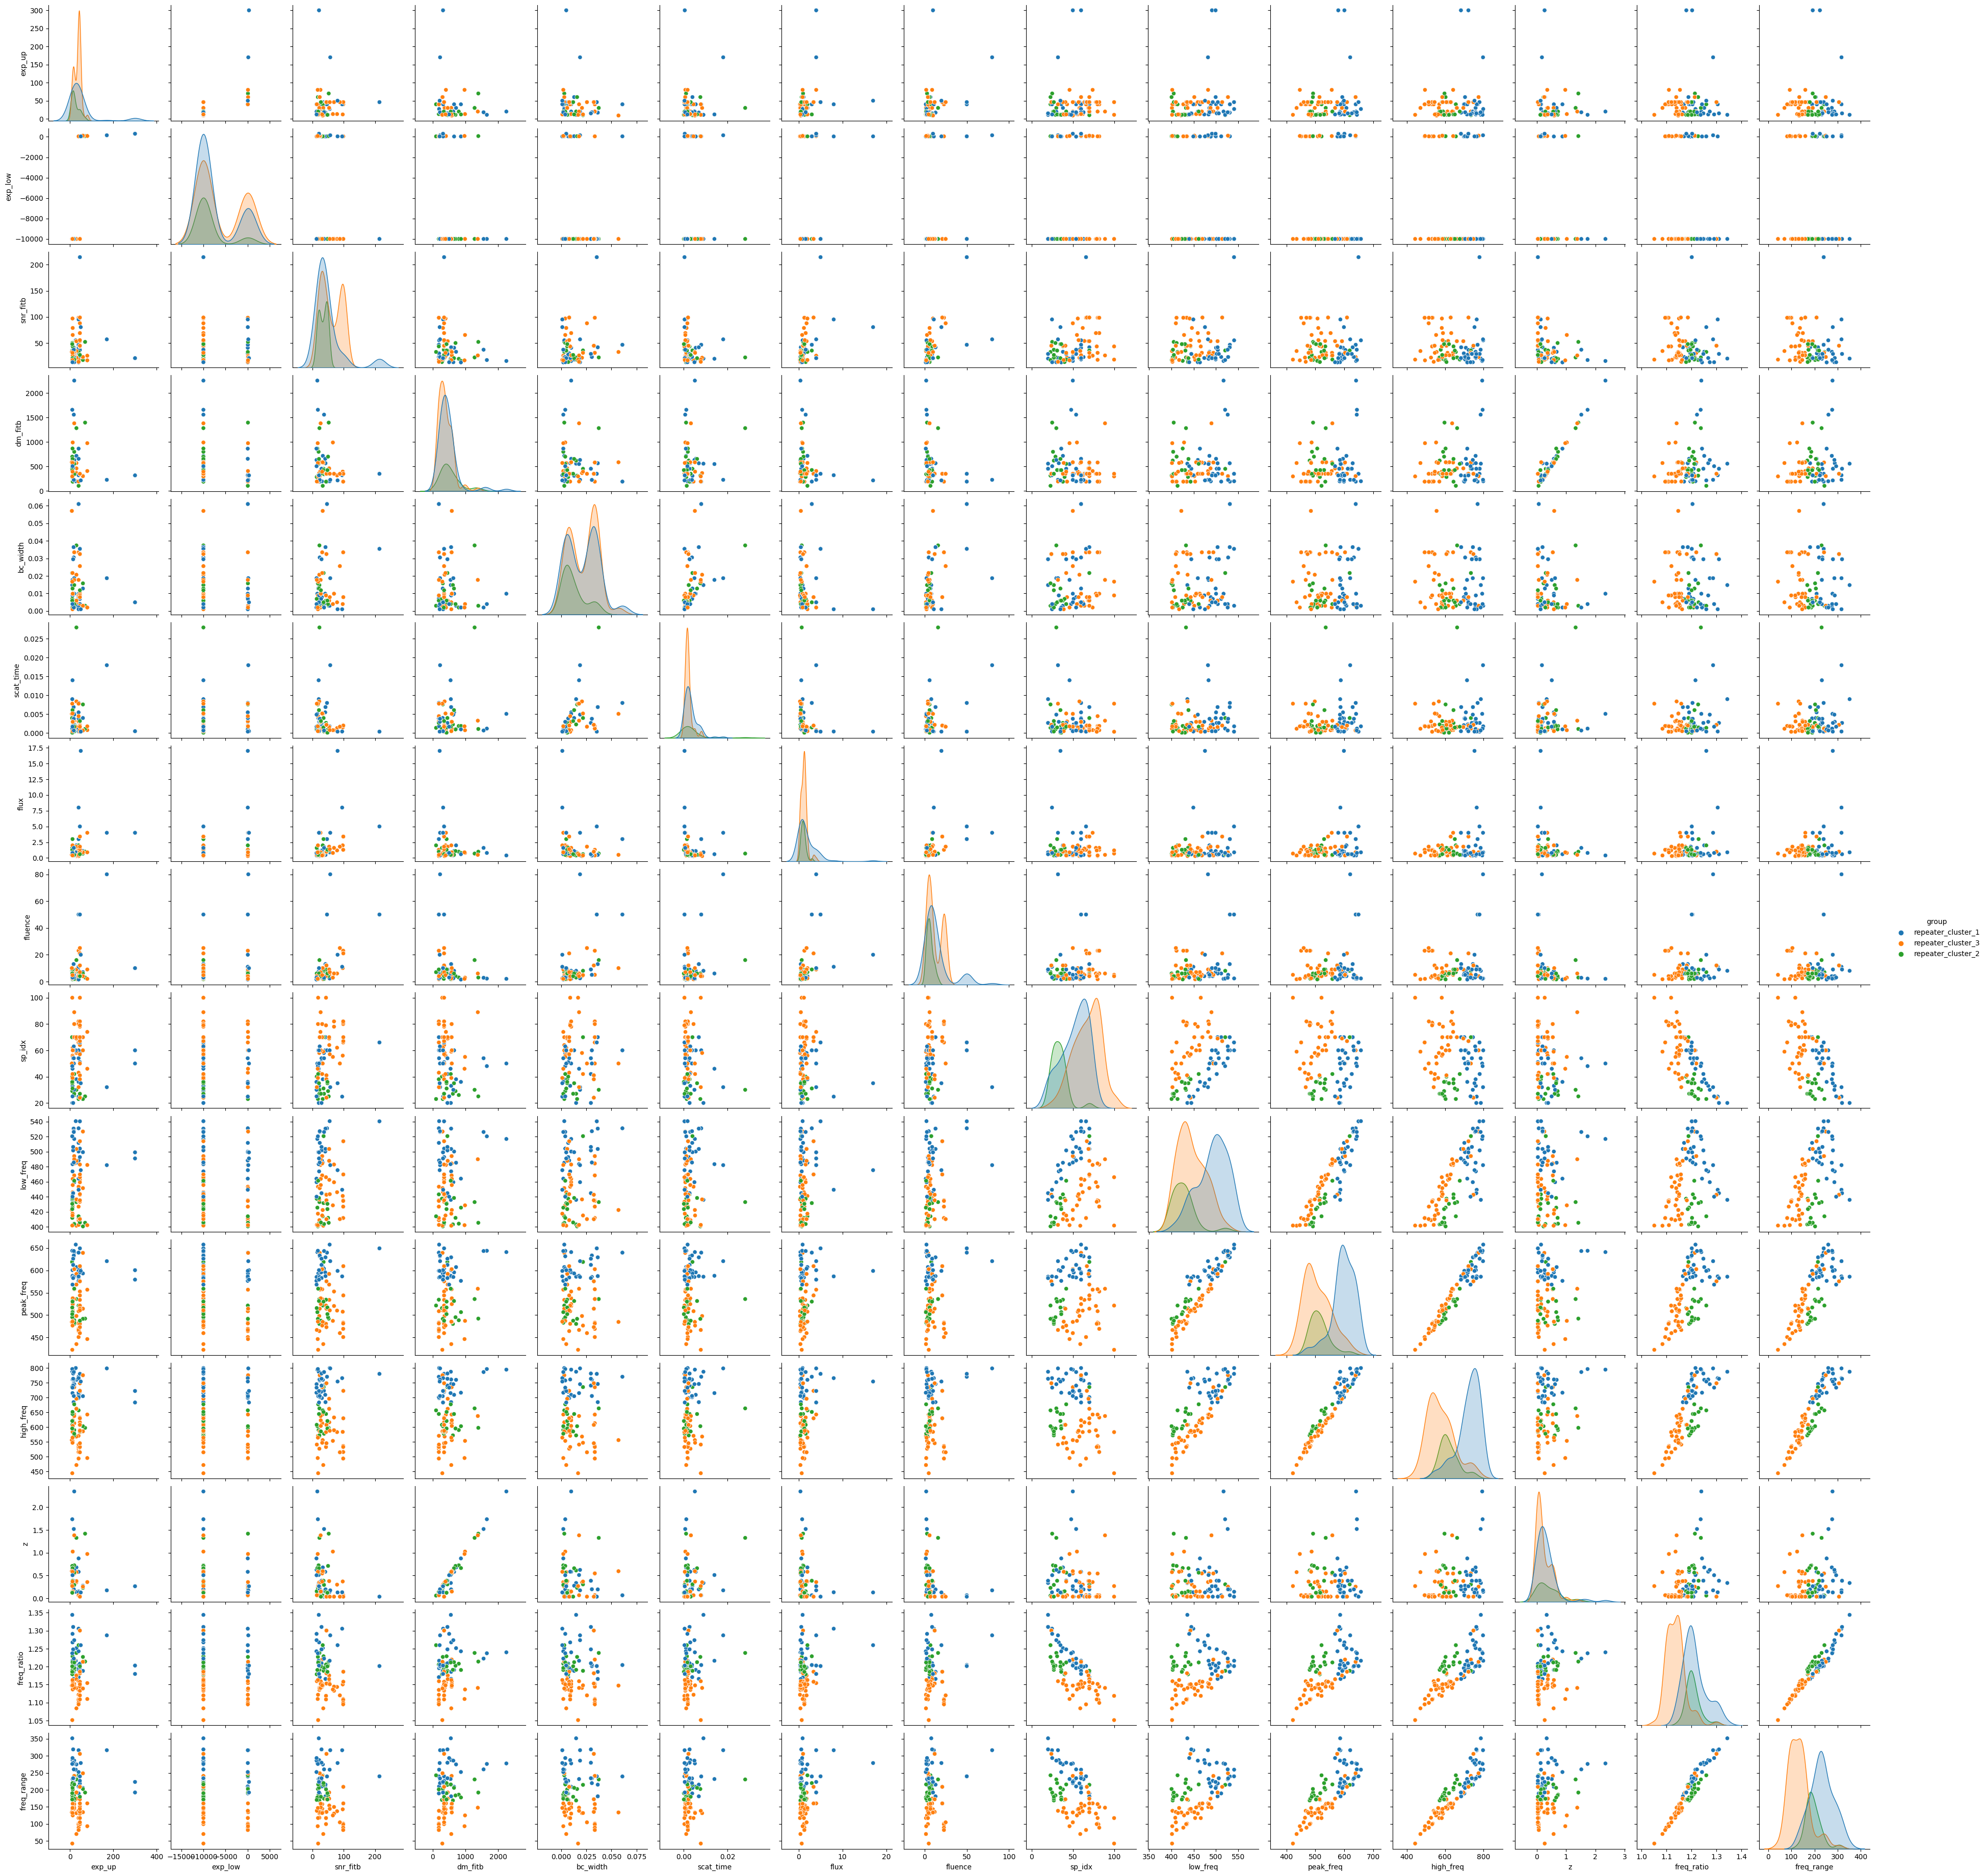

In [55]:
sns.pairplot(chen_[[*params]], hue='group')

In [2]:
df = pd.read_csv('../data/raw/external/chimefrbcat1_Hashimoto_2022.csv')
data = df.groupby('repeater_name').groups
data.pop('-9999') # Removes non repeaters
repeaters = pd.DataFrame({'name': data.keys(), 'sample_id':data.values()})
repeaters = repeaters.explode(['sample_id'])
df = df.reset_index()
rp = repeaters.merge(df[['index','tns_name']], right_on='index', left_on='sample_id')#.rename(columns={'tns_name': 'samples'})[['name', 'samples']]
rp.groupby('name').tns_name.aggregate(list)
rptes = rp.groupby('name').tns_name.aggregate(list).items()
rptrs = pd.DataFrame(rptes, columns=['name', 'samples'])
rptrs['source'] = 'Hashimoto2022'
rptrs.to_json('../data/raw/collected/repeaters.json', orient='records', indent=4)